In [174]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
    

class Seq:
    def __init__(self,x,n=1):
        self.x=np.repeat(x,n)
        self.n=n
        self.set_x=set(self.x)
        pass

    
    def chosen_mean(self, x=None):
            
        return sum([x[i] for i in range(len(x))])/len(x)

    def chosen_var(self,x=None):

           
        x_mean=self.chosen_mean(x)
        return sum([x[i]**2-x_mean**2 for i in range(len(x))])/len(x)
    
    def fix_chosen_var(self,x=None):

           
        return len(x)*self.chosen_var(x)/(len(x)-1)
    
    def chosen_first_m(self,x=None,k=2):

        
        return sum([x[i]**k for i in range(len(x))])/len(x)
    
    def plot(self,x=None,n=1):
        plt.step(x,n)
        plt.grid()
        plt.show
    
    def find_func(self,x=None,pprint=False):
        func_dict=dict()
        for t in x:
            func_dict[t] = len(x[x<t])/len(x)
        if pprint:
            text=''
            for i in range(len(list(func_dict.keys()))):
                if i == 0:
                    text+=f'\n{list(func_dict.values())[i]:<{len(max([str(i) for i in list(func_dict.values())],key=len))}} при {" "*len(max([str(i) for i in list(func_dict.keys())],key=len))}   x <= {list(func_dict.keys())[i]:<{len(max([str(i) for i in list(func_dict.keys())],key=len))}}'
                    
                else:
                    text+=f'\n{list(func_dict.values())[i]:<{len(max([str(i) for i in list(func_dict.values())],key=len))}} при {list(func_dict.keys())[i-1]:<{len(max([str(i) for i in list(func_dict.keys())],key=len))}} < x <= {list(func_dict.keys())[i]:<{len(max([str(i) for i in list(func_dict.keys())],key=len))}}'
            text+=f'\n{"1":<{len(max([str(i) for i in list(func_dict.values())],key=len))}} при {" "*len(max([str(i) for i in list(func_dict.keys())],key=len))}   x >  {list(func_dict.keys())[i]:<{len(max([str(i) for i in list(func_dict.keys())],key=len))}}'
                    
            print(text)
        else:
            return func_dict
    
    def get_emperic_value(self,x,t):
        func = self.find_func(x)
        
        keys = list(func.keys())
        if t<=min(keys):
            return 0
        elif t>max(keys):
            return 1
        else:
            for i in range(1,len(keys)):
                if keys[i-1]>t and t<=keys[i]:
                    return func[keys[i]]
    def plot(self,x):
        bin_dt, bin_gr = np.histogram(x, bins=len(x))
        Y = bin_dt.cumsum()
        for i in range(len(Y)):
            plt.plot([bin_gr[i], bin_gr[i+1]],[Y[i], Y[i]],color='magenta')
        plt.show()
        
    
    def do_all_func(self,k=2):
        x=self.x
        print(f'''Выборочное среднее = {self.chosen_mean(x)}
              
Выборочная дисперсия = {self.chosen_var(x)}

Исправленная дисперсия = {self.fix_chosen_var(x)}

Выборочный момент {k} = {self.chosen_first_m(x,k=k)}

Эмпирическая Функция:''')
        self.find_func(x,True)
        self.plot(x)
        

# Гмурман

# 441

Выборочное среднее = 4.4
              
Выборочная дисперсия = 3.639999999999992

Исправленная дисперсия = 3.714285714285706

Выборочный момент 4 = 725.0

Эмпирическая Функция:

0.0 при     x <= 1
0.2 при 1 < x <= 4
0.5 при 4 < x <= 6
1   при     x >  6


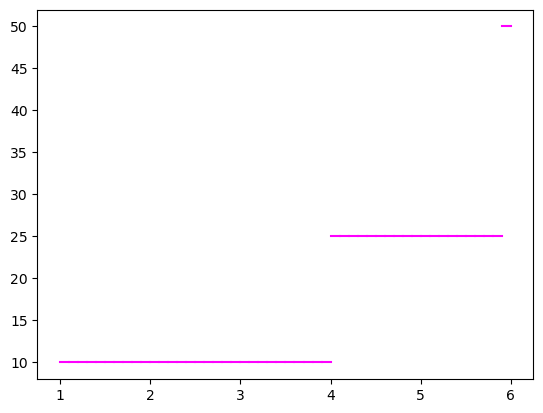

In [175]:
seq = Seq([1,4,6],[10,15,25])

seq.do_all_func(k=4)

## 442

### a

Выборочное среднее = 6.3
              
Выборочная дисперсия = 3.610000000000002

Исправленная дисперсия = 4.011111111111114

Выборочный момент 2 = 43.3

Эмпирическая Функция:

0.0 при     x <= 2
0.1 при 2 < x <= 5
0.4 при 5 < x <= 7
0.6 при 7 < x <= 8
1   при     x >  8


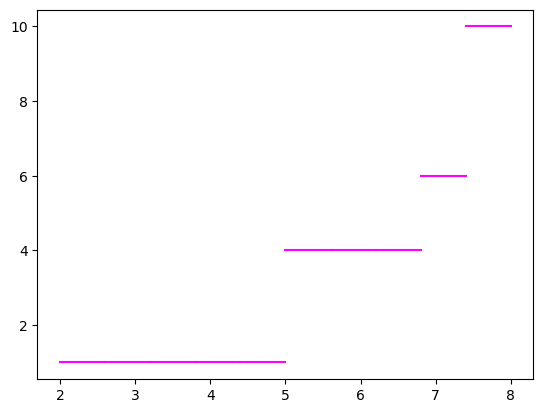

In [176]:
seq = Seq([2,5,7,8],[1,3,2,4])

seq.do_all_func()

### b

Выборочное среднее = 5.8
              
Выборочная дисперсия = 3.3599999999999994

Исправленная дисперсия = 3.7333333333333325

Выборочный момент 2 = 37.0

Эмпирическая Функция:

0.0 при     x <= 4
0.5 при 4 < x <= 7
0.7 при 7 < x <= 8
1   при     x >  8


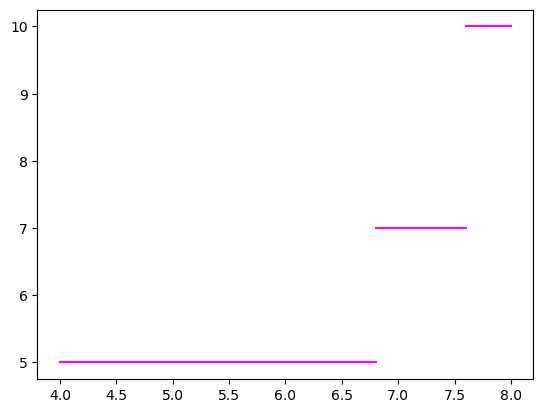

In [177]:
seq = Seq([4,7,8],[5,2,3])

seq.do_all_func()